<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> **Finanzas Cuantitativas | Verano 2021**. 

**Nombres:** 
- Juan Pablo Ruíz.
- Rubén Hernández.
- Bryan Juárez.

**Fecha:** 03 de junio del 2021.
    
<img style="float: right; margin: 30px 15px 15px 15px;" src="https://www.monash.edu/__data/assets/image/0004/1017517/iStock-611890326-OK3.jpg" width="300" height="500" />

**Expedientes** : 
- 721093.
- 717710.
- 722176.

**Profesor:** José Mario Zárate.  

## Tarea 3.

### Ejercicio 3.1

Revisit the example from previous class:

Buy a start up stock that doesn’t pay dividends estimate the Expected Results using Corporate Finance Theory the X factor stochastic.

Assume a normal distribution.
- Analytical method.
- Simulate in excel/python to test accuracy.

In [1]:
### Importamos librerias a utilizar.
import pandas as pd
import numpy as np
import numpy_financial as npf
import scipy.stats as st 
import warnings
from fitter import Fitter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
### Algunas funciones para pandas.
pd.core.common.is_list_like = pd.api.types.is_list_like

### `Datos de nuestro activo.`

Activo: **AMZN**
<br>
precio de cierre al: 01/06/2021
<br>
<li>${S_0}= 3218.65$</li>
<br>

**Datos financieros anuales 2020**

<br>
<li>Shares Outstanding= ${503}$M</li>
<br>

<li>Total Assets= ${321,195}$M</li>
<br>

<li>Total Liabilities= ${227,791}$M</li>
<br>

<li>Common Equity= ${93,404}$M</li>


### `Stock Fair Value`

Para calcular el precio justo de la acción seguimos los siguientes pasos:

1. Multiplicamos los activos por el factor de proyeción.
2. Al resultado del producto anterior le restamos los pasivos.
3. Tomando en cuenta la ecuación contable el resultado de esa sustracción sería el Capital.

$${A-L=E}$$

4. A ese capital lo igualamos al producto del precio de cierre de la acción y la cantidad de acciones en circulación.

$$E=PQ$$

5. Al despejar esa expreción nos queda que el precio justo es igual al Capital entre la cantidad de acciones en circulación.

$$P = \frac{E}{Q}$$


### `Introduciendo el factor de Incertidumbre`
<br>
<li>Asumimos el factor para la proyeción de los activos es una varible aleatoria la cual denotaremos como ${X}$.</li>
<br>
<li>Asumimos que ${X}$ sigue una distribución exponencial.</li>
<br>
<li>${X \sim \mathcal{Exp}(\lambda)}$</li>
<br>
<li>Recordando la PDF de la distribución exponencial: $ f(x) = {{\lambda}e^{-\lambda x}}$ con $\lambda > 0$.</li>
<br>
<li>Asumimos que el parámetro lambda de la distribución exponencial es de 0.4, es decir ${\lambda = 0.4}$</li>
<br>
<li>Recordamos que la Media para una distribución exponencial es : $E[X]=\frac{1}{\lambda}$</li>
<br>
<li>Por lo tanto la media es igual a: $E[X]=2.5$</li>
<br>
<li>Recordamos que la Varianza para una distribucipon exponencial es : $E[X]=\frac{1}{\lambda^2}$</li>
<br>
<li>Por lo tanto la varianza es igual a: $Var[X]=6.25$</li>
<br>


### `Cálculo del Valor Esperado por el método análitico`


<br>
<li>${F}$= Fair Value</li>
<br>
<li>${X}$= Factor de proyección</li>
<br>
<li>${A}$= Activos</li>
<br>
<li>${L}$= Pasivos</li>
<br>
<li>${n}$= acciones en circulación</li>
<br>
    
**Solución:**

Teniendo en cuenta los pasos anteriormente mencionados en el apartado de fair value, planteamos el Fair Value de la siguiente forma:

$$ F = \frac{AX - L}{n} $$

Procedemos a calcular el valor esperado, aplicando el operador Esperanza a la Expresión.

$$ E[F] = E\left[\frac{AX - L}{n}\right] $$

Sacamos la cte $n$.

$$ E[F] = \frac{1}{n}E\left[{AX - L}\right] $$

Reagrupamos la expresión de adentro.

$$ E[F] = \frac{1}{n}\left(E\left[{AX}\right]-E\left[{L}\right]\right)  $$

Una vez más sacamos la constante de la esperanza (Activos).

$$ E[F] = \frac{1}{n}\left(AE\left[{X}\right]-E\left[{L}\right]\right)  $$

Calculamos la Esperanza de una Cte la cual es una Cte (Pasivos).

$$ E[F] = \frac{1}{n}\left(AE\left[{X}\right]-L\right)  $$

Evaluamos nuestras variables en la expresión.

$$ E[F] = \frac{1}{503}\left((321195*2.5)-227791\right)  $$

Finalmente obtenemos: 

$$ E[F] = 1143.5318  $$


### `Cálculo de la Varianza por el método análitico`

$$ Var[F] = Var\left[\frac{AX - L}{n}\right] $$

Sacamos la Cte $n$ al cuadrado.

$$ Var[F] = \frac{1}{n^2}Var\left[{AX - L}\right] $$

Reagrupamos la Expresión y sacamos la Cte al cuadrado (Activos).

$$ Var[F] = \frac{1}{n^2}\left(A^2Var\left[{X}\right]-Var\left[{L}\right]\right)  $$

La Varianza de una Cte es 0 por lo que la varianza de los pasivos da cero.

$$ Var[F] = \frac{1}{n^2}\left(A^2Var\left[{X}\right]\right)  $$

Evaluamos nuestros datos en la expresión.

$$ Var[F] = \frac{1}{503^2}\left(321195^2*6.25\right)  $$

Finalmente obtenemos:

$$ Var[F] = 25484882$$

### `Simulando el factor X ` 
### $X \sim \mathcal{Exp}(\lambda)$ 
**Parámetros:**
$$
mean (\beta): \frac{1}{\lambda}
$$

$$
variance: \frac{1}{\lambda^2}
$$

$$
\lambda = \frac{1}{\beta}
$$

In [2]:
### Simulation
# Variables
A = 321_195 # Activos
L = 227_791 # Pasivos
E = 93_404 # Capital
Q = 503 # Número de Acciones en Circulación
So = 3_218.65 # Precio de cierre al 01/06/2021

In [3]:
def exp_gen(beta, n):
    X = np.random.exponential(scale = beta, size = n)
    return X

In [4]:
variables = np.concatenate([exp_gen(2.5, 1) for i in range(100000)])

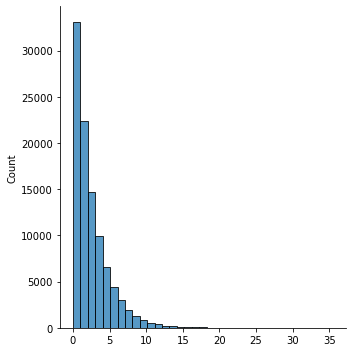

In [5]:
sns.displot(variables, bins = 35);

In [6]:
EF = [1/Q*((A*variables[i]) - L) for i in range(len(variables))]

In [7]:
len(EF)

100000

In [8]:
# Promedio de 100,000 EF generados con simulación
EF = np.mean(EF)
EF

1150.7512947352939

In [9]:
%%time
# Generar 1000 V.A exp 1000 veces. Total = 1,000,000 variables
X = [np.concatenate([exp_gen(2.5, 1) for i in range(1000)]) for i in range(1000)]

Wall time: 6.99 s


In [10]:
# Obtener E[X] para cada grupo de 1,000 V.A exp
EX = [np.mean(X[i]) for i in range(len(X))] # tamaño = 1,000

In [11]:
# Generar 1,000 lambdas 
lambdas = [1/np.mean(EX[i]) for i in range(len(EX))]
len(lambdas)

1000

In [12]:
# Obtener 1,000 Varianzas de X con cada lambda
varX = [1/lambdas[i]**2 for i in range(len(lambdas))]

In [13]:
# Obtener 1,000 Var[F]
varF = [(1/Q**2)*(A**2*varX[i]) for i in range(len(varX))]

In [14]:
# Promedio de las 1,000 Var[F] obtenido con simulación
varF = np.mean(varF)
varF

2556827.346418136

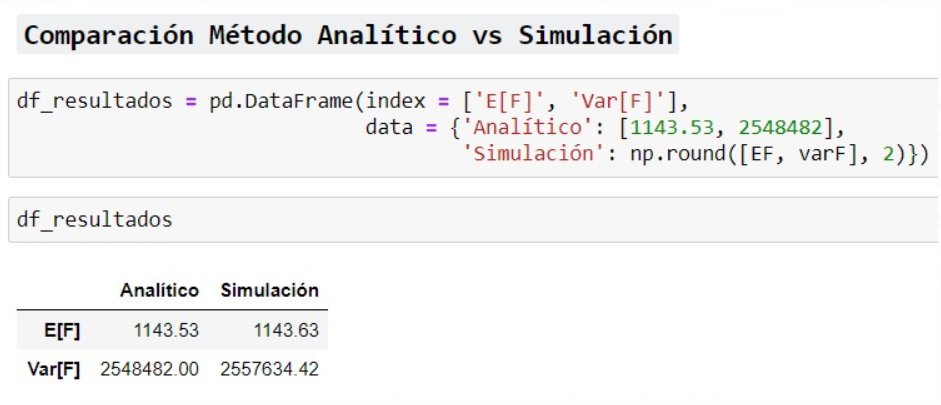

In [15]:
resultados = pd.DataFrame(index = ['E[F]', 'Var[F]'],
                          data = {'Analítico' : [1143.53, 2548482],
                                  'Simulación':np.round([EF, varF], 2)})
resultados

,Analítico,Simulación
E[F],1143.53,1150.75
Var[F],2548482.00,2556827.35


### Ejercicio 3.2

Using the properties of random variables and knowing the PDF of the sales product of each year answer analytically:

- What are the expected product sales for year 1 and year 2?
- What's the expected revenue in PV for the life of the product? What is the VAR?
- What's the expected NPV and VAR for NPV?
- Estimate the PDF of NPV and IRR answer analytically:
    1. What's the probability that the IRR is over the Risk free rate?
    2. What's the probability that the IRR is over the $35\%$?
    3. What's the probability that the project value is over $\$2\text{M}$?
    4. What’s the probability that the IRR is between $10\%$ and $20\%$?
    5. Do you get same responses as in Homework 1.1?

### `Import Data.`

In [16]:
### Comenzamos importando nuestro conjunto de datos a trabajar.
data_oil = pd.read_csv('Data_OilCompany.csv')
data_oil.head(10)

,Year 1,Year 2,Year 3,Year 4,Year 5
0,"203,726.00","279,969.00","465,303.00","200,445.00","96,319.00"
1,"263,845.00","272,439.00","2,192.00","199,901.00",-
2,"27,726.00","334,861.00","82,265.00","199,954.00","64,958.00"
3,"293,801.00","210,117.00","275,087.00","199,934.00",-
4,"297,319.00","242,569.00","464,097.00","200,598.00","141,285.00"
5,"36,012.00","296,235.00","484,943.00","199,842.00",-
6,"78,138.00","308,996.00","491,647.00","199,218.00","127,187.00"
7,"61,767.00","269,747.00","23,989.00","199,771.00",-
8,"346,503.00","172,903.00","41,218.00","200,827.00","80,270.00"
9,"149,681.00","205,417.00","441,224.00","199,658.00",-


### `Functions definition.`

In [17]:
### Definimos una función para reemplazar caracteres.
def replace_text(x, to_replace, replacement):
    try:
        x = x.replace(to_replace, replacement)
    except:
        pass
    return x

In [18]:
### Definimos una función que nos permita evaluar un proyecto con las metricas de NPV e IRR.
def get_project_valuation(data: 'DataFrame donde se almacenan los posibles valores de producción.',
                          invest: 'Inversión inicial.',
                          price: 'Precio de venta por unidad.',
                          cost: 'Costo fijo por unidad.',
                          fixed: 'Costo de mantenimiento anual.',
                          rf: 'Tasa libre de riesgo.'):
    
    '''La intención de está función es evaluar un proyecto a partir de las métricas del NPV y IRR.'''
    
    ### Definimos un data frame donde almacenaremos los flujos.
    # Flujos de inversión inicial.
    investment_flow = pd.DataFrame([-abs(invest)] * len(data))
    
    # Flujos correspondientes a las cantidades producidas.
    flows = pd.DataFrame([[data.T.iloc[i,j] * (price-cost) - fixed 
                           for i in range(len(data.columns))]
                           for j in range(len(data))])
    
    # Concatenamos los flujos.
    final_flows = pd.merge(investment_flow, flows, right_index=True, left_index=True)
    
    ### Calculamos el valor presente neto, NPV.
    npv_vector = [(npf.npv(rf, final_flows.iloc[i,:])) for i in range(len(final_flows))]
    
    ### Calculamos la tasa interna de retorno, IRR.
    irr_vector = [round(npf.irr(final_flows.iloc[i,:]), 2) for i in range(len(final_flows))]
    
    ### Estructuramos información final en un data frame.
    results = pd.DataFrame(columns=['NPV', 'IRR'])
    results.index.name = 'Scenarios'
    results['NPV'] = npv_vector
    results['IRR'] = irr_vector
    
    ### Retornamos el data frame creado.
    return results

In [19]:
### Definimos una serie de funciones para obtener el ajuste a una distribución teórica sobre un conjunto de datos dado.
### Create models from data.
def best_fit_distribution(data, bins, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

   # Distributions to check
   # DISTRIBUTIONS = [        
      #  st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
       # st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        #st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
      #  st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
      #  st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
      #  st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
      #  st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
      #  st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
      #  st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
      #  st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    #]

  # Distributions to check
    DISTRIBUTIONS = [        
        st.genexpon,st.lognorm,st.maxwell,st.norm,st.powerlognorm, st.uniform, st.expon
    ]


    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

### Make pdf adjustment.
def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [20]:
### Plotting distributions.
def plot_fit(data: 'Conjunto de datos sobre el cual se va a graficar.',
             bins: 'Número de categorias deseadas en el histograma.'):
    # Plot for comparison
    plt.figure(figsize=(12,8))
    ax = data.plot(kind='hist', bins=bins, density=True, alpha=0.5)
    # Save plot limits
    dataYLim = ax.get_ylim()

    # Find best fit distribution
    best_fit_name, best_fit_params = best_fit_distribution(data, bins, ax)
    best_dist = getattr(st, best_fit_name)

    # Update plots
    ax.set_ylim(dataYLim)
    ax.set_title(u'Data\n All Fitted Distributions')
    ax.set_xlabel(u'%')
    ax.set_ylabel('Frequency')
    
    plt.show()

    # Make PDF with best params 
    pdf = make_pdf(best_dist, best_fit_params)

    # Display
    plt.figure(figsize=(12,8))
    ax = pdf.plot(lw=2, label='PDF', legend=True)
    data.plot(kind='hist', bins=bins, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

    param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
    param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
    dist_str = '{}({})'.format(best_fit_name, param_str)

    ax.set_title(u'Data with best fit distribution \n' + dist_str)
    ax.set_xlabel(u'%')
    ax.set_ylabel('Frequency')
    
    plt.show()

### `Data Cleansing.`

In [21]:
# Primero iteramos para eliminar los espacios en las celdas de los valores y remplazamos el signo '-' por un 0.
data_oil_values = pd.DataFrame([[(replace_text(data_oil.iloc[i,j], ',', '').strip()) 
                                  for i in range(len(data_oil))] 
                                  for j in range(len(data_oil.columns))][0:5]).replace('-', '0').T

# Iteramos para volver numéricos los valores.
data_oil_values = pd.DataFrame([[int(float(data_oil_values.iloc[i,j]))
                                 for i in range(len(data_oil_values))]
                                 for j in range(len(data_oil_values.columns))])

# Visualizamos.
data_oil_values.T.head(10)

,0,1,2,3,4
0,203726,279969,465303,200445,96319
1,263845,272439,2192,199901,0
2,27726,334861,82265,199954,64958
3,293801,210117,275087,199934,0
4,297319,242569,464097,200598,141285
5,36012,296235,484943,199842,0
6,78138,308996,491647,199218,127187
7,61767,269747,23989,199771,0
8,346503,172903,41218,200827,80270
9,149681,205417,441224,199658,0


In [22]:
# Por cuestión de estética reestructuramos la información en un nuevo data frame.
data_oil_final = pd.DataFrame(np.asmatrix(data_oil_values.T),
                              columns = ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5'])

# Visualizamos.
data_oil_final.index.name = 'Scenarios'
data_oil_final.head(10)

,Year 1,Year 2,Year 3,Year 4,Year 5
Scenarios,,,,,
0,203726,279969,465303,200445,96319
1,263845,272439,2192,199901,0
2,27726,334861,82265,199954,64958
3,293801,210117,275087,199934,0
4,297319,242569,464097,200598,141285
5,36012,296235,484943,199842,0
6,78138,308996,491647,199218,127187
7,61767,269747,23989,199771,0
8,346503,172903,41218,200827,80270


### `Questions.`

**_Answer analytically_.**

**1°- What are the expected product sales for year 1 and year 2?**

Para poder contestar análiticamente, es necesario recordar en primera instancia la propiedad aditiva de la esperanza matemática de las variables aleatorias.
- Sea $X:$ Sales for year 1.
- Sea $Y:$ Sales for year 2.

Entonces:
$$E[X+Y] = E[X]+E[Y]$$

Sin embargo, está propiedad se cumple si ambas variables aleatorias se distribuyen de la misma manera. En este caso particular, afirmar algo así podría llevarnos a cometer un error, es por eso que para poder calcular el valor esperado de las ventas para el año 1 y el año 2, la aproximación correcta sería a partir de la suma de las esperanzas individuales, de manera que:
$$E[Z] = E[X]+E[Y]$$

Con la intención de obtener un resultado numérico, lo que haremos será ajustar distribuciones teóricas a nuestros conjuntos de datos (ventas año 1 y ventas año 2), esto para conocer los parámetros óptimos.

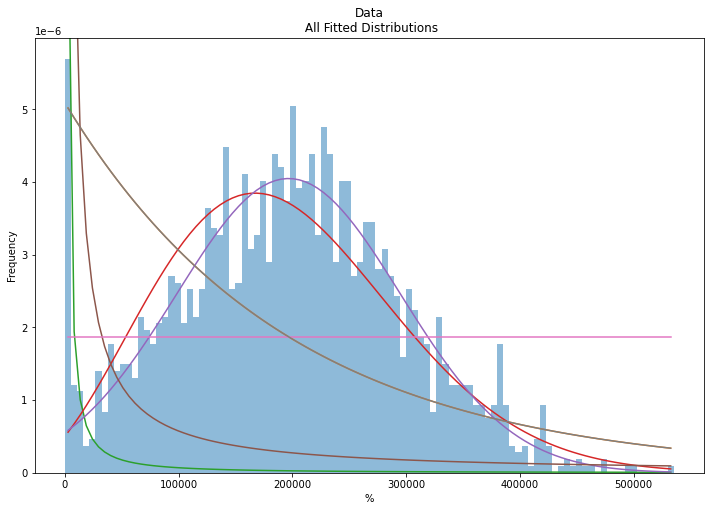

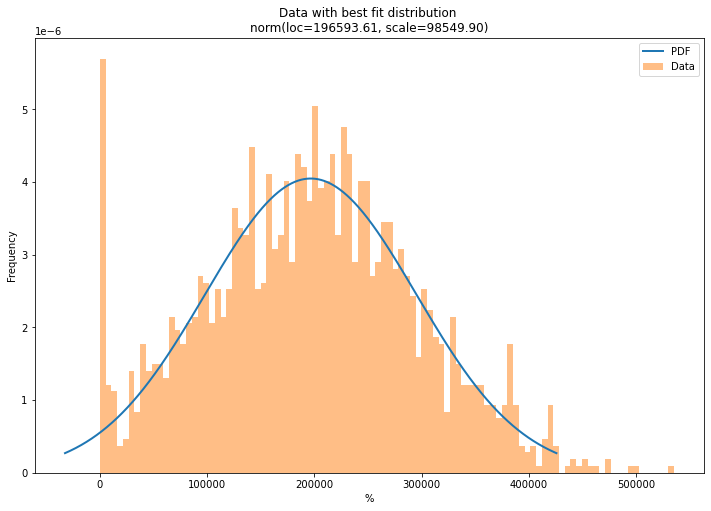

In [23]:
### Calcular distribución para año 1.
plot_fit(data_oil_final['Year 1'], bins=100)

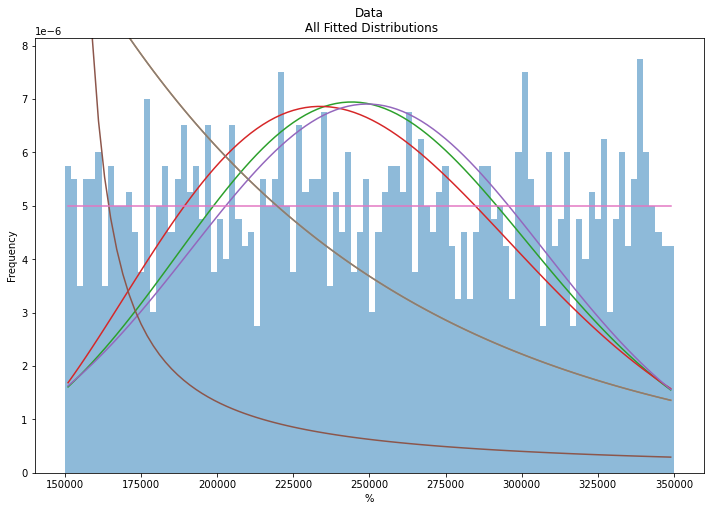

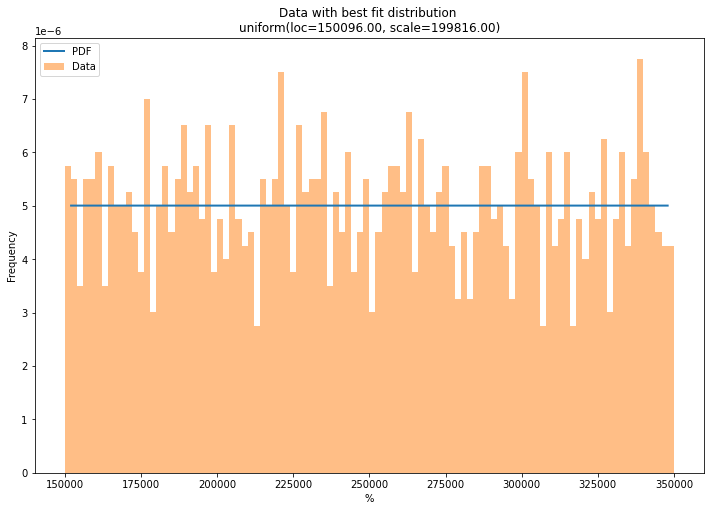

In [24]:
### Calcular distribución para año 2.
plot_fit(data_oil_final['Year 2'], bins=100)

De los ajustes obtenidos se obtuvieron los siguientes resultados.
- $\text{Year 1} \sim \mathcal{N}(\mu=196,593.61, \sigma^{2}=(98,549.90)^{2})$
- $\text{Year 2} \sim \mathcal{U}(\text{a}=150,096, \text{b}=349,912)$

Donde para el caso normal tenemos que:
- $\text{Media} = \mu$
- $\text{Varianza} = \sigma^{2}$

Y para el caso uniforme:
- $\text{Media} = \frac{\text{a}+\text{b}}{2}$
- $\text{Varianza} = \frac{(\text{b}-\text{a})^{2}}{12}$

Entonces, ya con las distribuciones definidas y conociendo que el valor esperado para ambas distribuciones es de $\mu$, podemos definir el valor esperado ahora para la suma de las ventas en el año 1 y el año 2:
$$E[Z] = \mu_{1} + \frac{\text{a}+\text{b}}{2}$$

Traduciendolo a términos numéricos tenemos entonces que:
$$E[Z] = 196,593.61 + \frac{150,096 + 349,912}{2}$$

Simplificando:

$\therefore E[Z] = 446,597.61$

**2°- What's the expected revenue in PV for the life of the product? What is the VAR?**

Recordando que el valor presente de los flujos se determina de manera individual de la siguiente manera:

$$\text{PV} = \frac{X(P-C)-F}{(1+rf)^{t}}$$

Donde:
- $X: \text{Representa la variable estocástica a modelar, en este caso particular, las ventas en cada año.}$
- $P: \text{Representa el precio de venta por unidad.}$
- $C: \text{Representa el costo fijo por unidad de venta.}$
- $F: \text{Representa el costo de mantenimiento de la inversión.}$
- $rf: \text{Representa la tasa libre de riesgo.}$

Traduciendolo a términos generales obtenemos entonces el **valor presente neto**, el cual se visualiza por la siguiente expresión:

$$\text{NPV} = \sum_{i=1}^{n} \frac{X_{i}(P-C)-F}{(1+rf)^{t_{i}}}$$

**Cálculo del valor esperado.**

Entonces para poder calcular el valor esperado del **NPV** es necesario aplicar el operador esperanza a toda la ecuación:

$$E[\text{NPV}] = E\bigg[\sum_{i=1}^{n} \frac{X_{i}(P-C)-F}{(1+rf)^{t_{i}}} \bigg]$$

En este caso particular contamos con 5 años, y cada año tiene una distribución diferente, es por eso que por _linealidad_ del operador esperanza, podemos calcular el valor esperado de cada componente de la sumatoria de manera individual. Desglozandolo de la siguiente manera:

$$E[\text{NPV}] = E\bigg[\frac{X_{1}(P-C)-F}{(1+rf)^{t_{1}}} + \frac{X_{2}(P-C)-F}{(1+rf)^{t_{2}}} + \frac{X_{3}(P-C)-F}{(1+rf)^{t_{3}}} + \frac{X_{4}(P-C)-F}{(1+rf)^{t_{4}}} + \frac{X_{5}(P-C)-F}{(1+rf)^{t_{5}}} \bigg]$$

A simple vista observamos que el factor $(P-C)-F$ es constante, y por propiedades del valor esperado podemos sacar dichos valores constantes del operador esperanza: 

$$E[\text{NPV}] = ((P-C)-F) \times E\bigg[\frac{X_{1}}{(1+rf)^{t_{1}}} + \frac{X_{2}}{(1+rf)^{t_{2}}} + \frac{X_{3}}{(1+rf)^{t_{3}}} + \frac{X_{4}}{(1+rf)^{t_{4}}} + \frac{X_{5}}{(1+rf)^{t_{5}}} \bigg]$$

Ahora, sabemos que para cada año, la distribución de los escenarios de producción tienen una distribución de probabilidad diferente. Es por eso que el siguiente paso es estimar la distribución correspondiente a cada conjunto de datos, y sus parámetros óptimos con la función de máxima verosimilitud:

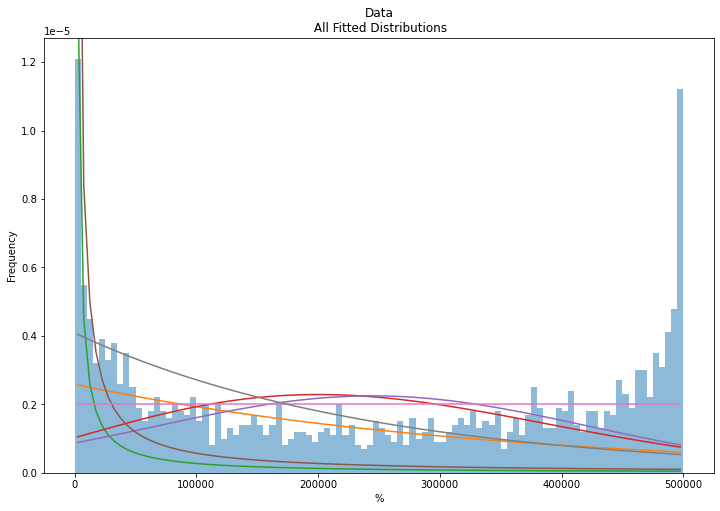

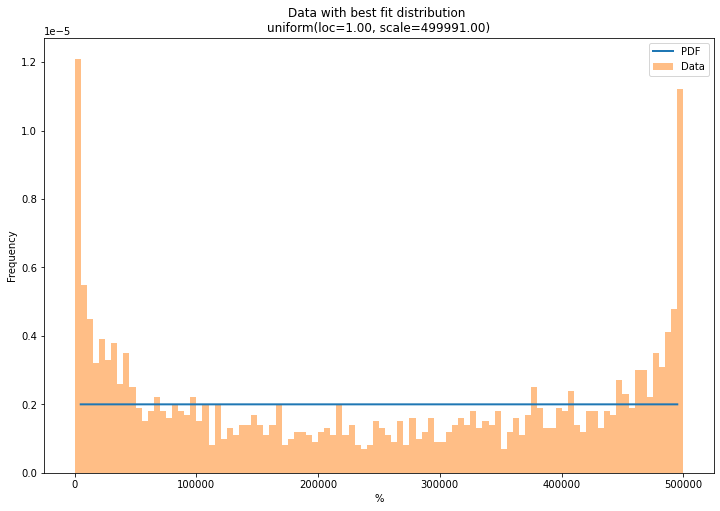

In [25]:
### Calcular distribución para año 3.
plot_fit(data_oil_final['Year 3'], bins=100)

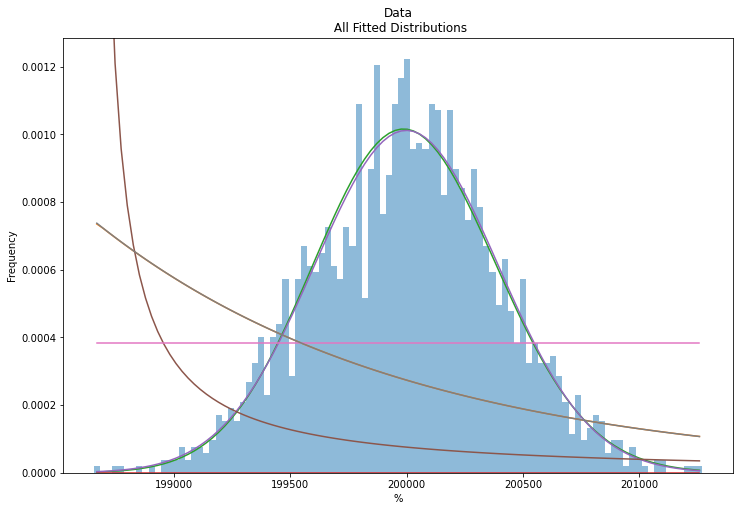

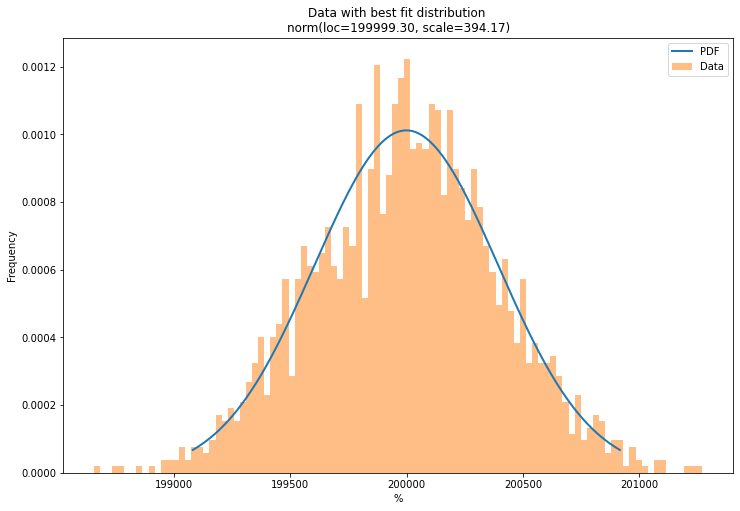

In [26]:
### Calcular distribución para año 4.
plot_fit(data_oil_final['Year 4'], bins=100)

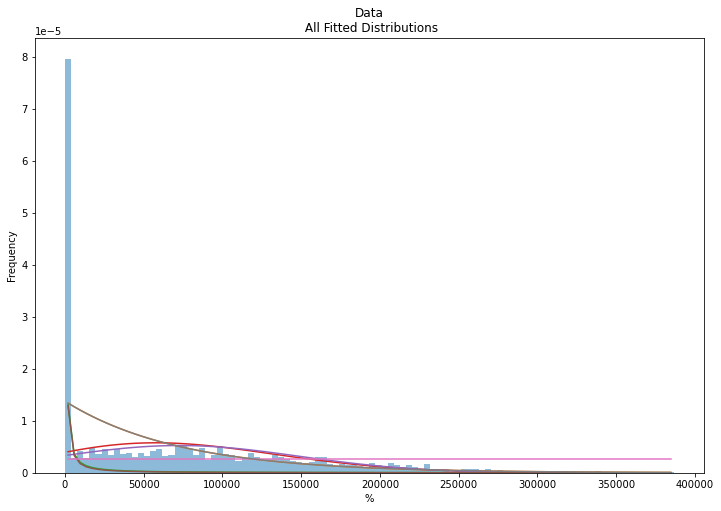

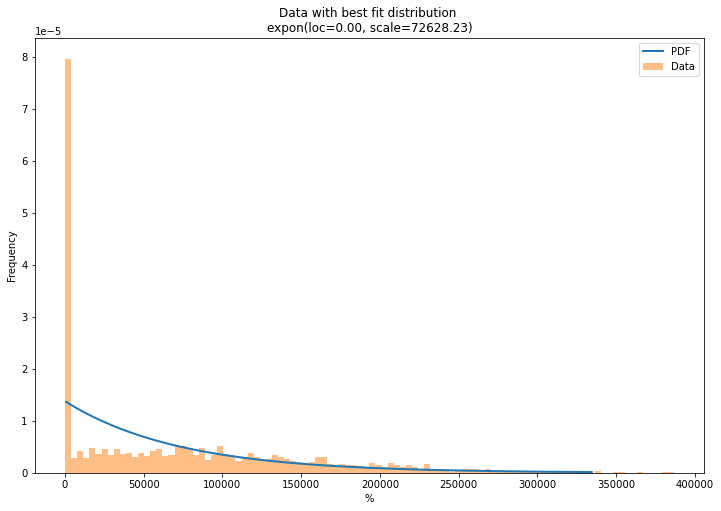

In [27]:
### Calcular distribución para año 5.
plot_fit(data_oil_final['Year 5'], bins=100)

Entonces con los ajustes realizados, tenemos la distribución de probabilidad correspondiente a cada año de ventas, los cuales podemos resumir a continuación:

- $\text{Year 1} \sim \mathcal{N}(\mu=196,593.61, \sigma^{2}=(98,549.90)^{2})$
- $\text{Year 2} \sim \mathcal{U}(\text{a}=150,096, \text{b}=349,912)$
- $\text{Year 3} \sim \mathcal{U}(\text{a}=1, \text{b}=499,992)$
- $\text{Year 4} \sim \mathcal{N}(\mu=199,999.30, \sigma^{2}=(394.17)^{2})$
- $\text{Year 5} \sim \mathcal{E}\bigg(\lambda=\frac{1}{72,628.23}\bigg)$

Donde para el caso normal tenemos que:
- $\text{Media} = \mu$
- $\text{Varianza} = \sigma^{2}$

Para el caso uniforme:
- $\text{Media} = \frac{\text{a}+\text{b}}{2}$
- $\text{Varianza} = \frac{(\text{b}-\text{a})^{2}}{12}$

Y para el caso exponencial:
- $\text{Media} = \frac{1}{\lambda}$
- $\text{Varianza} = \frac{1}{\lambda^{2}}$

Recapitulando la ecuación del valor esperado del **NPV**:

$$E[\text{NPV}] = ((P-C)-F) \times E\bigg[\frac{X_{1}}{(1+rf)^{t_{1}}} + \frac{X_{2}}{(1+rf)^{t_{2}}} + \frac{X_{3}}{(1+rf)^{t_{3}}} + \frac{X_{4}}{(1+rf)^{t_{4}}} + \frac{X_{5}}{(1+rf)^{t_{5}}} \bigg]$$

Por propiedades de linealidad del operador esperanza, tenemos que:

$$E[\text{NPV}] = ((P-C)-F) \times \bigg[E\bigg[\frac{X_{1}}{(1+rf)^{t_{1}}}\bigg] + E\bigg[\frac{X_{2}}{(1+rf)^{t_{2}}}\bigg] + E\bigg[\frac{X_{3}}{(1+rf)^{t_{3}}}\bigg] + E\bigg[\frac{X_{4}}{(1+rf)^{t_{4}}}\bigg] + E\bigg[\frac{X_{5}}{(1+rf)^{t_{5}}}\bigg] \bigg]$$

De la ecuación anterior, observamos que el factor $\frac{1}{(1+rf)^t}$ es constante para cada valor esperado correspondiente, por lo tanto, podemos sacarlo como una constante para cada $E[X]$:

$$E[\text{NPV}] = ((P-C)-F) \times \bigg[\frac{1}{(1+rf)^{t_{1}}} \dot\ E[X_{1}] + \frac{1}{(1+rf)^{t_{2}}} \dot\ E[X_{2}] + \frac{1}{(1+rf)^{t_{3}}} \dot\ E[X_{3}] + \frac{1}{(1+rf)^{t_{4}}} \dot\ E[X_{4}] + \frac{1}{(1+rf)^{t_{5}}} \dot\ E[X_{5}] \bigg]$$

Sustituyendo por valores númericos $P$, $C$, $F$ y $rf$, donde:

- $P = \$5$
- $C = \$0.8$
- $F = \$40,000$
- $rf = 3\%$

Obtenemos la siguiente expresión:

$$E[\text{NPV}] = ((5-0.8)-40,000) \times \bigg[\frac{1}{(1.03)^{1}} \dot\ E[X_{1}] + \frac{1}{(1.03)^{2}} \dot\ E[X_{2}] + \frac{1}{(1.03)^{3}} \dot\ E[X_{3}] + \frac{1}{(1.03)^{4}} \dot\ E[X_{4}] + \frac{1}{(1.03)^{5}} \dot\ E[X_{5}] \bigg]$$

Lo que sigue ahora es determinar el valor esperado de cada $X_{i}$ esto con las propiedades particulares que tenemos respecto a cada distribución, de manera que obtenemos que:

- $E[X_{1}] = 196,593.61$
- $E[X_{2}] = 250,004$
- $E[X_{3}] = 249,996.5$
- $E[X_{4}] = 199,999.30$
- $E[X_{5}] = 72,628.23$

Sustituyendo estos valores en la ecuación del **NPV**:

$$E[\text{NPV}] = ((5-0.8)-40,000) \times \bigg[\frac{196,593.61}{(1.03)^{1}} + \frac{250,004}{(1.03)^{2}} + \frac{249,996.5}{(1.03)^{3}} + \frac{199,999.30}{(1.03)^{4}} + \frac{72,628.23}{(1.03)^{5}} \bigg]$$

Ya con el factor estocástico definido como un número determinado, lo que haremos ahora será distribuir el factor $(P-C)-F$ en toda la ecuación:

$$E[\text{NPV}] = \bigg[\frac{196,593.61(5-0.8)-40,000}{(1.03)^{1}} + \frac{250,004(5-0.8)-40,000}{(1.03)^{2}} + \frac{249,996.5(5-0.8)-40,000}{(1.03)^{3}} + \frac{199,999.30(5-0.8)-40,000}{(1.03)^{4}} + \frac{72,628.23(5-0.8)-40,000}{(1.03)^{5}} \bigg]$$

Simplificando la expresión:

$$E[\text{NPV}] = \bigg[\frac{785,693.162}{(1.03)^{1}} + \frac{1,010,016.8}{(1.03)^{2}} + \frac{1,009,985.3}{(1.03)^{3}} + \frac{799,997.06}{(1.03)^{4}} + \frac{265,038.566}{(1.03)^{5}} \bigg]$$

Resolvemos cada expresión de manera individual y agregamos el flujo de la inversión inicial, esto lo podemos hacer hasta este momento porque el valor esperado de una constante es la misma constante, es decir $E[c] = c$:

$$E[\text{NPV}] = [-1,800,000 + 762,808.8951 + 952,037.7038 + 924,279.6234 + 710,787.0262 + 228,624.5952]$$

Realizamos la suma resultante y obtenemos que:

$\therefore E[\text{NPV}] = \$1,778,537.844$

**Cálculo de la varianza.**

Ahora, para poder cálcular la varianza del **NPV**, utilizaremos la expresión ya desglozada para el valor presente neto y sobre esa ecuación definimos la varianza. Para este estudio particular, asumiremos una **covarianza** entre las variables aleatorias igual a $0$, es decir, no existe correlación de entre ellas.

$$\text{Var}[\text{NPV}] = \text{Var}\bigg[\frac{X_{1}(P-C)-F}{(1+rf)^{t_{1}}} + \frac{X_{2}(P-C)-F}{(1+rf)^{t_{2}}} + \frac{X_{3}(P-C)-F}{(1+rf)^{t_{3}}} + \frac{X_{4}(P-C)-F}{(1+rf)^{t_{4}}} + \frac{X_{5}(P-C)-F}{(1+rf)^{t_{5}}} \bigg]$$

Por linealidad del operador varianza, podemos distribuir el operador para cada conjunto que compone la sumatoria:

$$\text{Var}[\text{NPV}] = \text{Var}\bigg[\frac{X_{1}(P-C)-F}{(1+rf)^{t_{1}}} \bigg] + \text{Var}\bigg[\frac{X_{2}(P-C)-F}{(1+rf)^{t_{2}}}\bigg] + \text{Var}\bigg[\frac{X_{3}(P-C)-F}{(1+rf)^{t_{3}}}\bigg] + \text{Var}\bigg[\frac{X_{4}(P-C)-F}{(1+rf)^{t_{4}}}\bigg] + \text{Var}\bigg[\frac{X_{5}(P-C)-F}{(1+rf)^{t_{5}}} \bigg]$$

De manera generalizada se observa que el factor $\frac{(P-C)}{(1+rf)^{t_{i}}}$ es constante para cada valor de la sumatoria, es por eso que puede salir como constante en cada caso particular, de manera que:

$$\text{Var}[\text{NPV}] = \frac{(P-C)^2}{(1+rf)^{2t_{1}}} \dot\ \text{Var}[X_{1}-F] + \frac{(P-C)^2}{(1+rf)^{2t_{2}}} \dot\ \text{Var}[X_{2}-F] + \frac{(P-C)^2}{(1+rf)^{2t_{3}}} \dot\ \text{Var}[X_{3}-F] + \frac{(P-C)^2}{(1+rf)^{2t_{4}}} \dot\ \text{Var}[X_{4}-F] + \frac{(P-C)^2}{(1+rf)^{2t_{5}}} \dot\ \text{Var}[X_{5}-F]$$

Sabemos que por linealidad de la varianza podemos separar la expresión $\text{Var}[X_{i}-F]$ en $\text{Var}[X_{i}] - \text{Var}[F]$ y conociendo que $F$ es una constane y la varianza de una constante es igual a $0$, entonces $\text{Var}[X_{i}-F]=\text{Var}[X_{i}]$. Reemplazamos esta expresión en la ecuación:

$$\text{Var}[\text{NPV}] = \frac{(P-C)^2}{(1+rf)^{2t_{1}}} \dot\ \text{Var}[X_{1}] + \frac{(P-C)^2}{(1+rf)^{2t_{2}}} \dot\ \text{Var}[X_{2}] + \frac{(P-C)^2}{(1+rf)^{2t_{3}}} \dot\ \text{Var}[X_{3}] + \frac{(P-C)^2}{(1+rf)^{2t_{4}}} \dot\ \text{Var}[X_{4}] + \frac{(P-C)^2}{(1+rf)^{2t_{5}}} \dot\ \text{Var}[X_{5}]$$

Sustituimos nuestras variables constantes por valores numéricos:

$$\text{Var}[\text{NPV}] = \frac{(5-0.8)^2}{(1.03)^{2}} \dot\ \text{Var}[X_{1}] + \frac{(5-0.8)^2}{(1.03)^{4}} \dot\ \text{Var}[X_{2}] + \frac{(5-0.8)^2}{(1.03)^{6}} \dot\ \text{Var}[X_{3}] + \frac{(5-0.8)^2}{(1.03)^{8}} \dot\ \text{Var}[X_{4}] + \frac{(5-0.8)^2}{(1.03)^{10}} \dot\ \text{Var}[X_{5}]$$

Ahora, lo que haremos será determinar la varianza correspondiente a cada variable aleatoria, donde gracias a las propiedades que definimos previamente, sabemos que:

- $\text{Var}[X_{1}] = 9,712,082,790.009$
- $\text{Var}[X_{2}] = 3,327,202,821.33$
- $\text{Var}[X_{3}] = 20,832,583,340.08$
- $\text{Var}[X_{4}] = 155,369.98$
- $\text{Var}[X_{5}] = 5,274,859,792.93$

Simplificamos la expresión y sustituimos estos valores de varianza en la ecuación correspondiente:

$$\text{Var}[\text{NPV}] = \frac{17.64 \dot\ (9,712,082,790.009)}{(1.03)^{2}} + \frac{17.65 \dot\ (3,327,202,821.33)}{(1.03)^{4}} + \frac{17.64 \dot\ (20,832,583,340.08)}{(1.03)^{6}} + \frac{17.64 \dot\ (155,369.98)}{(1.03)^{8}} + \frac{17.64 \dot\ (5,274,859,792.93)}{(1.03)^{10}}$$

Resolvemos numéricamente para cada elemento de la sumatoria. En este caso particular omitimos el agregar la inversión inicial en el flujo porque sabemos que la varianza de una constante es igual a $0$, es decir, $\text{Var}[c] = 0$:

$$\text{Var}[\text{NPV}] = 161,486,606,104.02 + 52,146,955,445.209 + 307,764,384,514.197 + 2,163,554.766 + 69,236,842,542.76$$

Realizamos la sumatoria restante y obtenemos que:

$\therefore \text{Var}[\text{NPV}] = 590,636,952,160.952$

**3°- What's the expected NPV and VAR for NPV?**

Para responder a esto, lo primero que haremos será calcular el valor del **NPV** con nuestra función en python.

In [28]:
### Comenzamos definiendo los parámetros.
invest = 1800000
price = 5
cost = 0.8
fixed = 40000
rf = 0.03

### Valuamos el proyecto.
project_valuation = get_project_valuation(data_oil_final, invest, price, cost, fixed, rf)

### Tomamos el valor del NPV.
npv = project_valuation['NPV']

### Obtenemos las medidas estadísticas de medias y varianzas.
print(f'La media del NPV es de: {npv.mean()}')
print(f'La varianza del NPV es de: {npv.var()}')

La media del NPV es de: 1754930.8721101447
La varianza del NPV es de: 760191816886.5785


In [29]:
### A manera de comparación contrastaremos los resultados obtenidos de manera analítica y los obtenidos con python.
com = pd.DataFrame(columns=['$$E[X]$$', '$$\text{Var}[X]$$'],
                   index=['Analytical', 'Python'])

com['$$E[X]$$'] = [1778537.844, npv.mean()]
com['$$\text{Var}[X]$$'] = [590636952160.952, npv.var()]
com

,$$E[X]$$,$$\text{Var}[X]$$
Analytical,1.778538e+06,5.906370e+11
Python,1.754931e+06,7.601918e+11


De los resultados, se observa que a pesar de que los valores tienen la misma escala, la realidad es que están variando considerablemente, esto se debe principalmente a que en la solución propuesta por python estamos asumiendo la misma función de densidad de probabilidad para los diferentes escenarios de venta que en cada año, mientrás que en la solución análitica propuesta se realizó un análisis particular de su **PDF**, con lo cual se espera, el resultado analítico sea más realista.

**4°- Estimate the PDF of NPV and IRR answer analytically:**

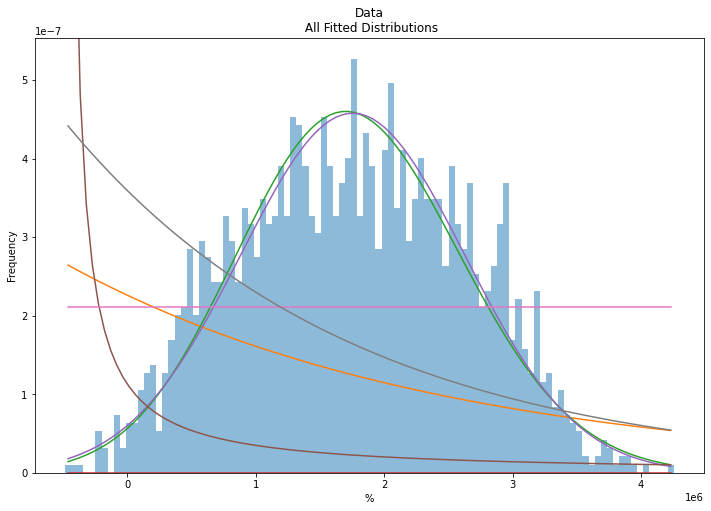

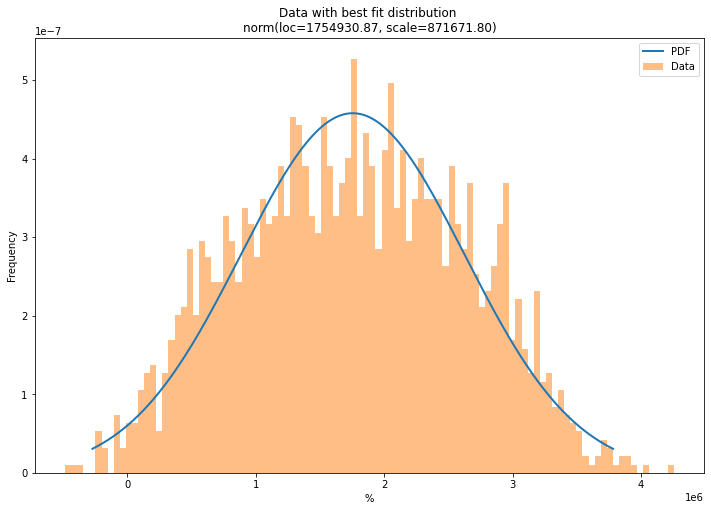

In [30]:
### Comenzamos estimando la PDF para NPV y IRR.
# Almacenamos el valor de la IRR en un vector.
irr = project_valuation['IRR']

### Calculamos PDF de NPV.
plot_fit(npv, bins=100)

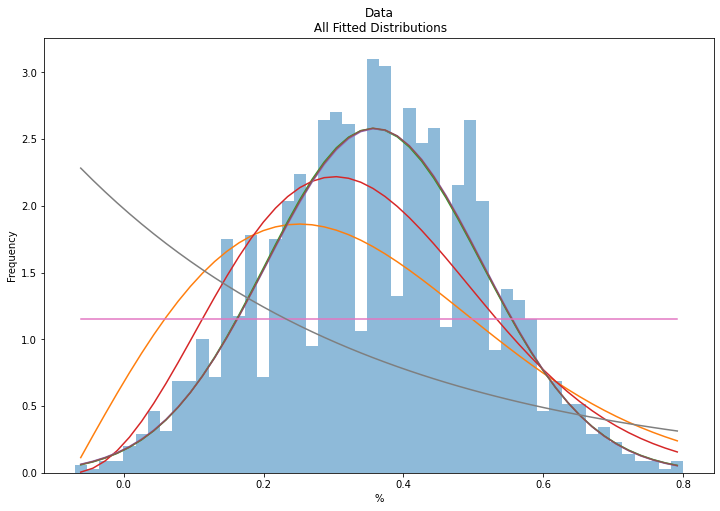

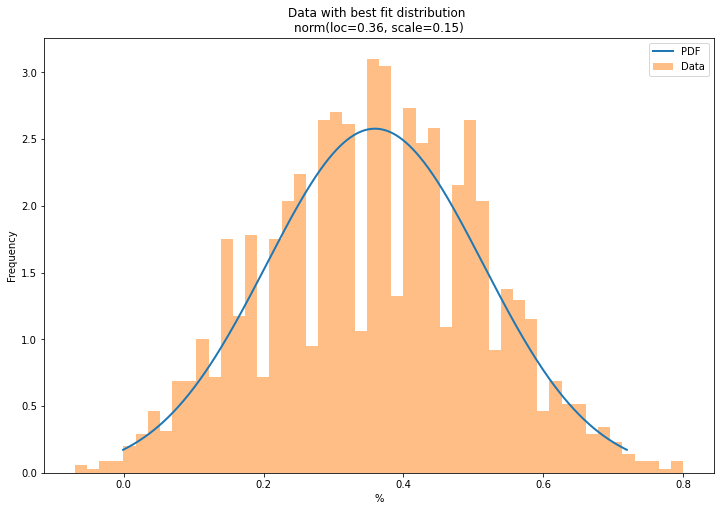

In [31]:
### Ahora para la IRR.
plot_fit(irr, bins=50)

De los resultados obtenidos tenemos que las distribuciones correspondientes son:

- $\text{NPV} \sim \mathcal{N}(\mu=1,754,930.87, \sigma^{2} = (871,671.80)^{2})$
- $\text{IRR} \sim \mathcal{N}(\mu=0.36, \sigma^{2}=(0.15)^2)$

**_a) What's the probability that the IRR is over the Risk free rate?_**

Debido a que estamos trabajando con distribuciones normales, podemos obtener las probabilidades, podemos trabajar con la forma estandarizada:

$$P(X>a) = 1 - P\bigg(Z < \frac{a - \mu}{\sqrt{\sigma^{2}}} \bigg)$$

Entonces para responder el inciso _a)_ se puede observar de la siguiente manera:

$$P(X>0.03) = 1 - P\bigg(Z < \frac{0.03 - 0.36}{\sqrt{(0.15)^{2}}} \bigg)$$

Resolviendo tenemos que:

$$P(X>0.03) = 1 - P(Z < -2.19)$$

Buscando dicha probabilidad en la "tabla Z" obtenemos lo siguiente:

$$P(X>0.03) = 1 - 0.0143$$

$\therefore P(X>0.03) = 98.57\%$


**_b) What's the probability that the IRR is over the $35\%$?_**

De manera análoga a como lo hicimos en el inciso pasado, tenemos que:

$$P(X>0.35) = 1 - P\bigg(Z < \frac{0.35 - 0.36}{\sqrt{(0.15)^{2}}} \bigg)$$

Resolviendo tenemos que:

$$P(X>0.35) = 1 - P(Z < -0.06)$$

Buscando dicha probabilidad en la "tabla Z" obtenemos lo siguiente:

$$P(X>0.03) = 1 - 0.4760$$

$\therefore P(X>0.35) = 52.4\%$

**_c) What's the probability that the project value is over $\$2\text{M}$?_**

Para este caso particular lo que necesitamos ahora es utilizar la distribución del **NPV**:

$$P(X>2,000,000) = 1 - P\bigg(Z < \frac{2,000,000 - 1,754,930.87}{\sqrt{(871,671.80)^{2}}} \bigg)$$

Resolviendo tenemos que:

$$P(X>2,000,000) = 1 - P(Z < 0.28)$$

Buscando dicha probabilidad en la "tabla Z" obtenemos lo siguiente:

$$P(X>0.03) = 1 - 0.6102$$

$\therefore P(X>2,000,000) = 38.98\%$

**_d) What’s the probability that the IRR is between $10\%$ and $20\%$?_**

Para este caso particular, usaremos el mismo enfoque, de manera que:

$$P(0.10 < X < 0.20) = P(X<0.20) - P(X<0.10)$$

Comenzamos calculando $P(X<0.20)$:

$$P(X<0.20) = P\bigg(Z < \frac{0.20 - 0.36}{\sqrt{(0.15)^{2}}} \bigg)$$

Resolviendo tenemos que:

$$P(X<0.20) = P\bigg(Z < -1.06\bigg)$$

Buscando dicha probabilidad en la "tabla Z" obtenemos lo siguiente:

$$P(X<0.20) = 14.45\%$$

Ahora calculamos $P(X<0.10)$:

$$P(X<0.10) = P\bigg(Z < \frac{0.10 - 0.36}{\sqrt{(0.15)^{2}}} \bigg)$$

Resolviendo tenemos que:

$$P(X<0.10) = P(Z < -1.73)$$

Buscando dicha probabilidad en la "tabla Z" obtenemos lo siguiente:

$$P(X<0.10) = 4.18\%$$

Ya con ambos elementos identificados obtenemos que:

$\therefore P(0.10 < X < 0.20) = 10.27\%$


**_e) Do you get same responses as in Homework 1.1?_**

Se obtuvieron resultados muy similares, variando en decimales, dicho fenómeno se puede deber principalmente a dos motivos, uno de ellos es que la variación de decimales en las operaciones haya afectado el resultado o a pesar de que el mejor ajuste es la distribución normal, probablemente no sea el óptimo para el conjunto de datos.

A pesar de esta situación se obtuvieron resultados muy satisfactorios al respecto y el modelado con la distribución normal dio valores similares a los obtenidos con el enfoque frecuentista de la probabilidad.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Juan Pablo Ruíz, Rubén Hernández, Bryan Juárez.
</footer>